In [215]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
import visualkeras
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [216]:
train_path = "D:/datasets/Images/casting_data/casting_data/training data"
test_path = "D:/datasets/Images/casting_data/casting_data/testing data"

In [217]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    zoom_range=0.2,  # Randomly zoom into images
    fill_mode = 'nearest',
    validation_split=0.2  # Split data into training and validation sets (20% for validation)
)

In [218]:
# Train data (80%)
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(64,64),  # Resize images to 64x64
    batch_size=32,
    class_mode='binary',  # Use binary labels
    subset='training',  # Set as training data
    shuffle = True
)

# Validation data (20%)
validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',  # Use binary labels
    subset='validation', # Set as validation data
    shuffle = True
)

Found 5307 images belonging to 2 classes.
Found 1326 images belonging to 2 classes.


In [219]:
# Test data
datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = datagen.flow_from_directory(
    test_path,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

Found 715 images belonging to 2 classes.


In [220]:
# Check class names
class_names = train_generator.class_indices
class_names = list(class_names.keys())
print(class_names)

['def_front', 'ok_front']


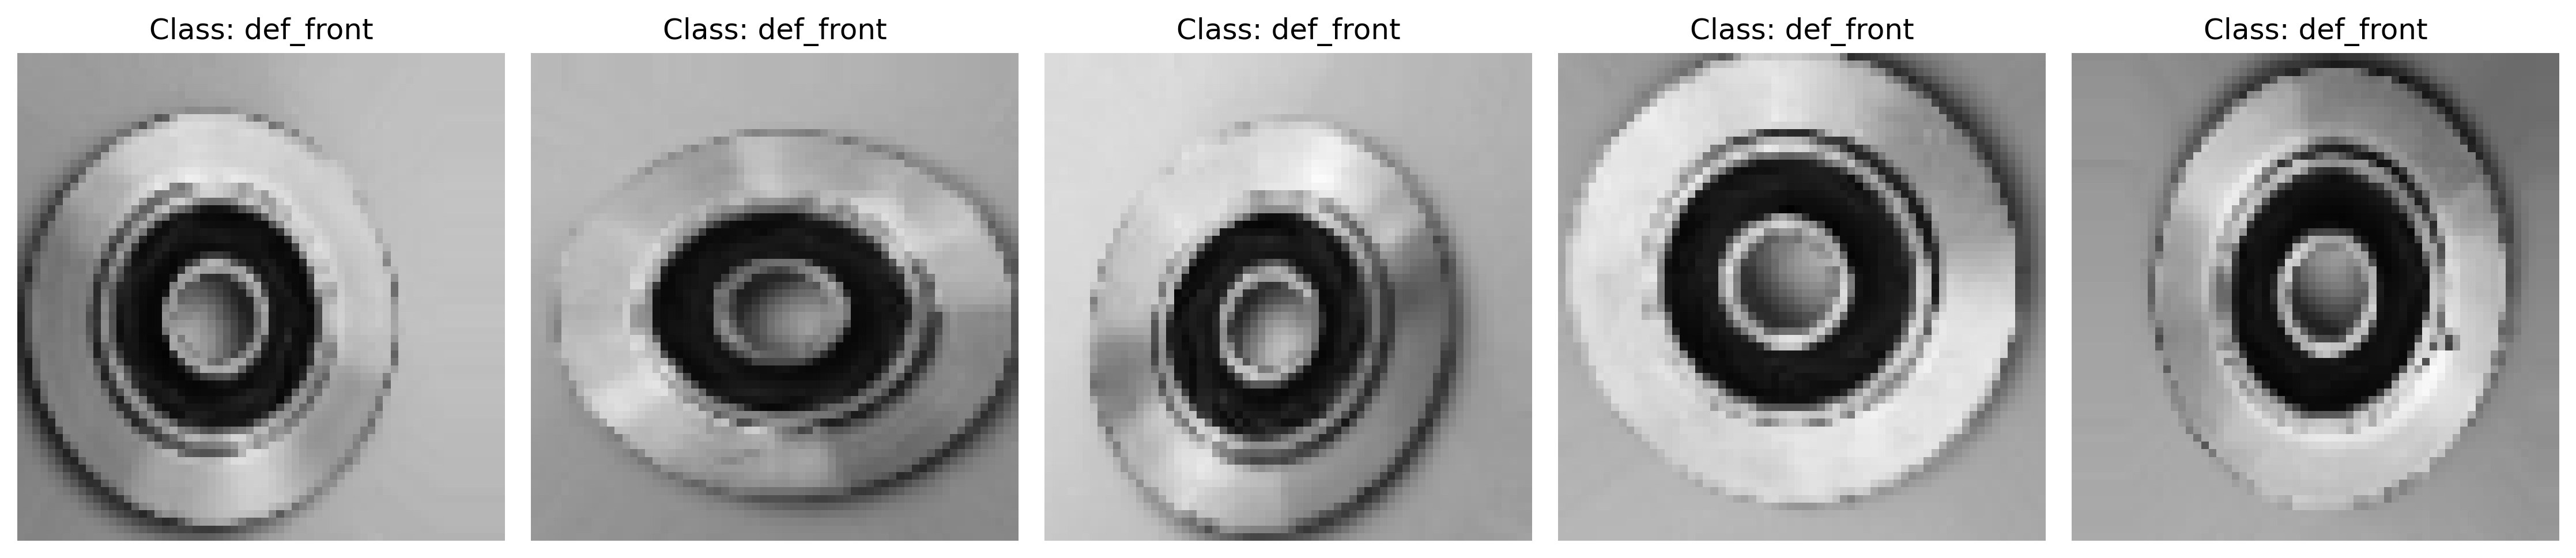

In [221]:
import matplotlib.pyplot as plt

# Set higher DPI for better image clarity
plt.rcParams['figure.dpi'] = 300  # Increase the DPI for better resolution
plt.rcParams['savefig.dpi'] = 300  # Ensure saved figures also have high DPI

# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

# Create a figure to display the images
plt.figure(figsize=(15,10))

# Loop through the first 5 images
for i in range(5):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    plt.imshow(images[i])  # Display the image
    plt.title(f'Class: {class_names[labels[i].argmax()]}')  # Display the class name
    plt.axis('off')  # Hide the axes

# Show the plot
plt.tight_layout()
plt.show()

In [222]:
# Build a custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.33),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

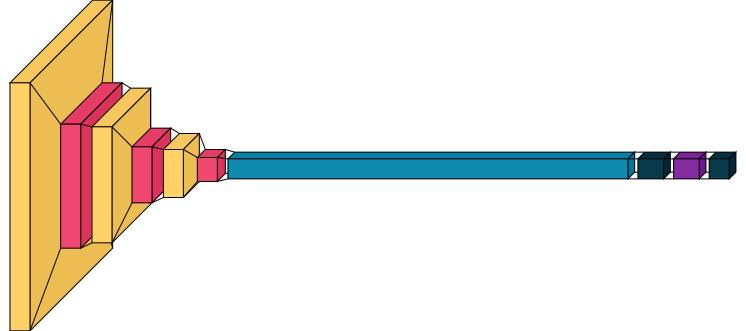

In [209]:
visualkeras.layered_view(model)

In [223]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,273,409 (4.86 MB)

 Trainable params: 1,273,409 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [224]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True  # Restore model weights from the epoch with the best value
)

In [225]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks = [early_stopping])

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 58s 330ms/step - accuracy: 0.5463 - loss: 0.7116 - val_accuracy: 0.6229 - val_loss: 0.6736
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 53s 320ms/step - accuracy: 0.6238 - loss: 0.6473 - val_accuracy: 0.7051 - val_loss: 0.5662
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 54s 325ms/step - accuracy: 0.6917 - loss: 0.5837 - val_accuracy: 0.7805 - val_loss: 0.4751
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 54s 325ms/step - accuracy: 0.7567 - loss: 0.4833 - val_accuracy: 0.8341 - val_loss: 0.3938
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 54s 323ms/step - accuracy: 0.8375 - loss: 0.3784 - val_accuracy: 0.8409 - val_loss: 0.3661
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 54s 327ms/step - accuracy: 0.8621 - loss: 0.3187 - val_accuracy: 0.9057 - val_loss: 0.2552
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 54s 326ms/step - accuracy: 0.8966 - loss: 0.2439 - val_accuracy: 0.8967 - val_loss: 0.2366
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 54s 326ms/step - accuracy: 0.8980 - loss: 0

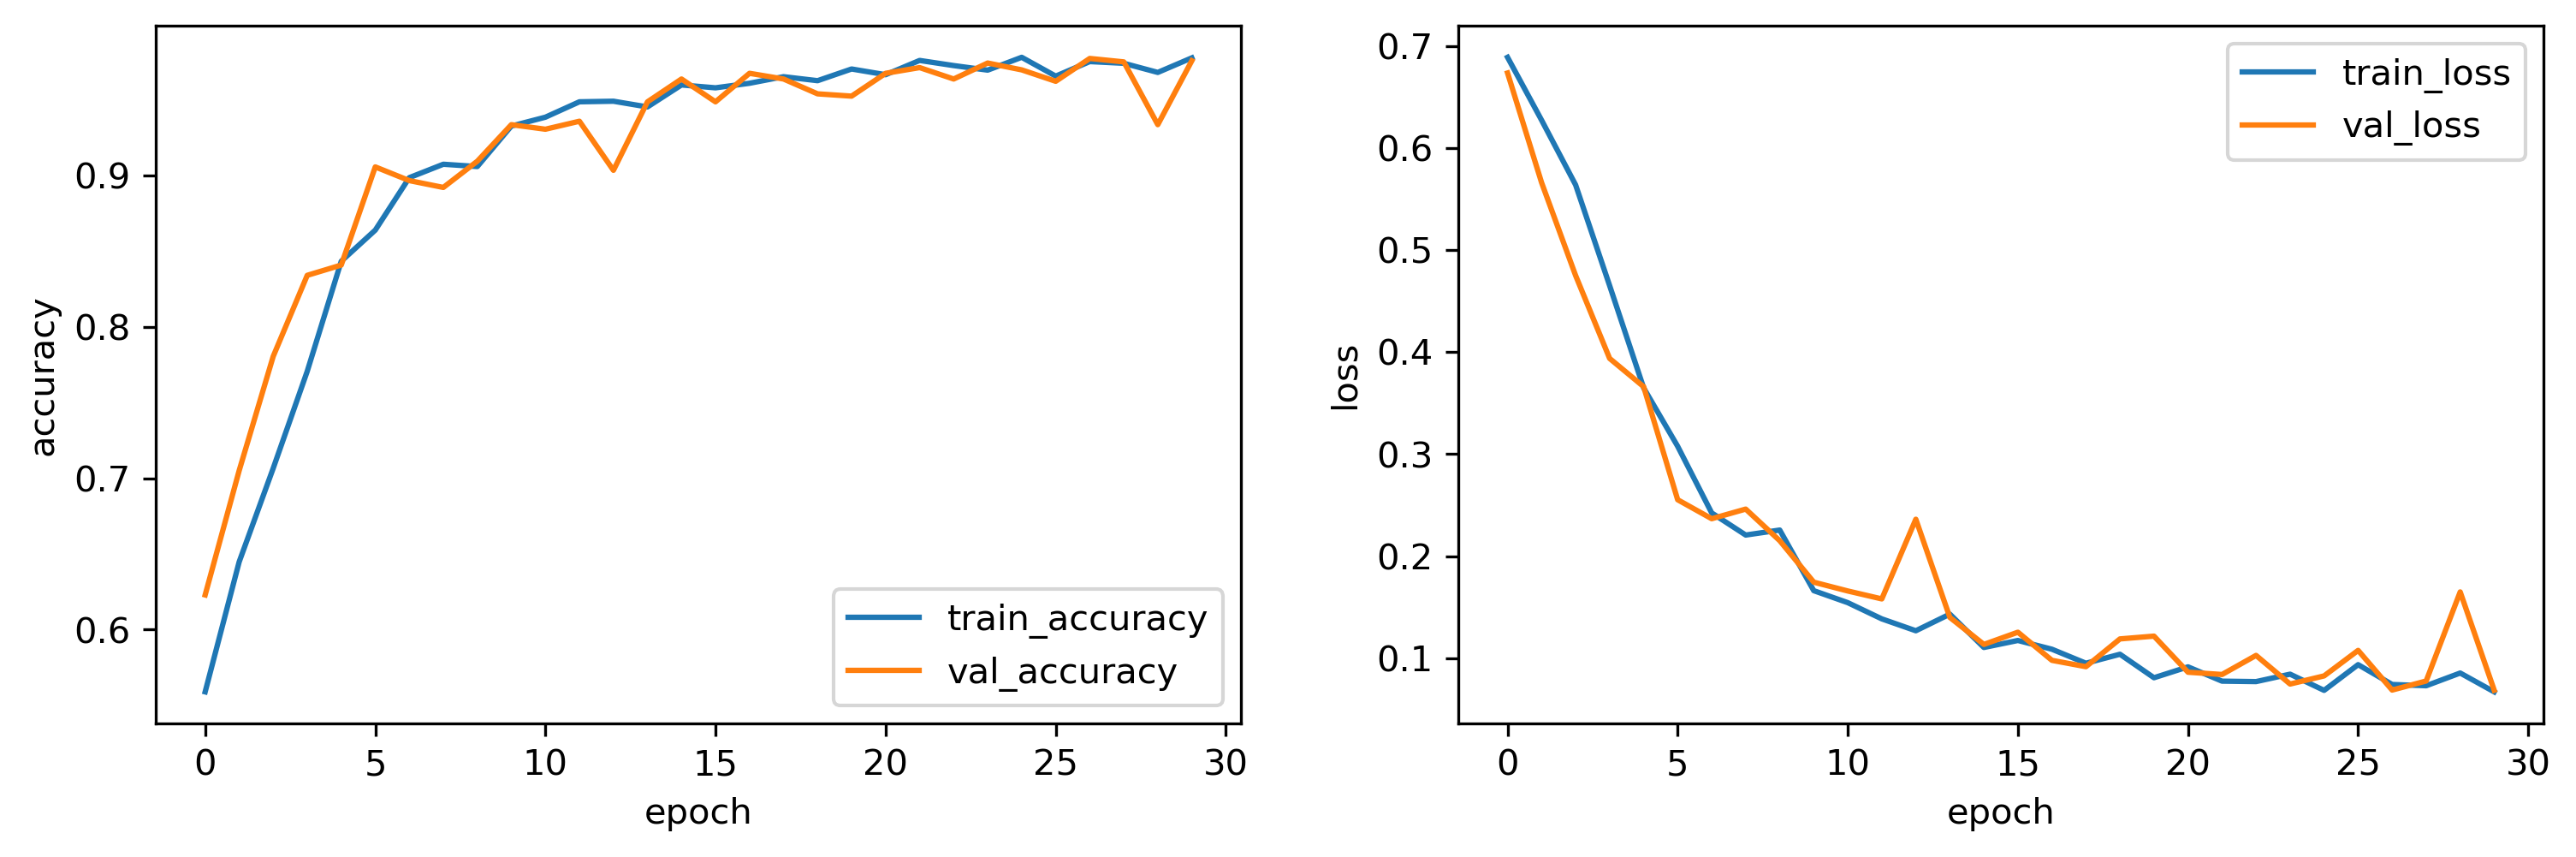

In [226]:
import matplotlib.pyplot as plt
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

plot_results(model)

In [227]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8844 - loss: 0.3853
Test Loss: 0.2588
Test Accuracy: 0.9189


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
Class Indices: {'def_front': 0, 'ok_front': 1}
Sample True Labels (First 10): [0 0 0 0 0 0 0 0 0 0]
Sample Predictions (First 10): [0 0 0 0 0 0 0 1 0 0]

Classification Report:
              precision    recall  f1-score   support

   def_front       1.00      0.87      0.93       453
    ok_front       0.82      1.00      0.90       262

    accuracy                           0.92       715
   macro avg       0.91      0.94      0.92       715
weighted avg       0.93      0.92      0.92       715


Confusion Matrix:
[[395  58]
 [  0 262]]


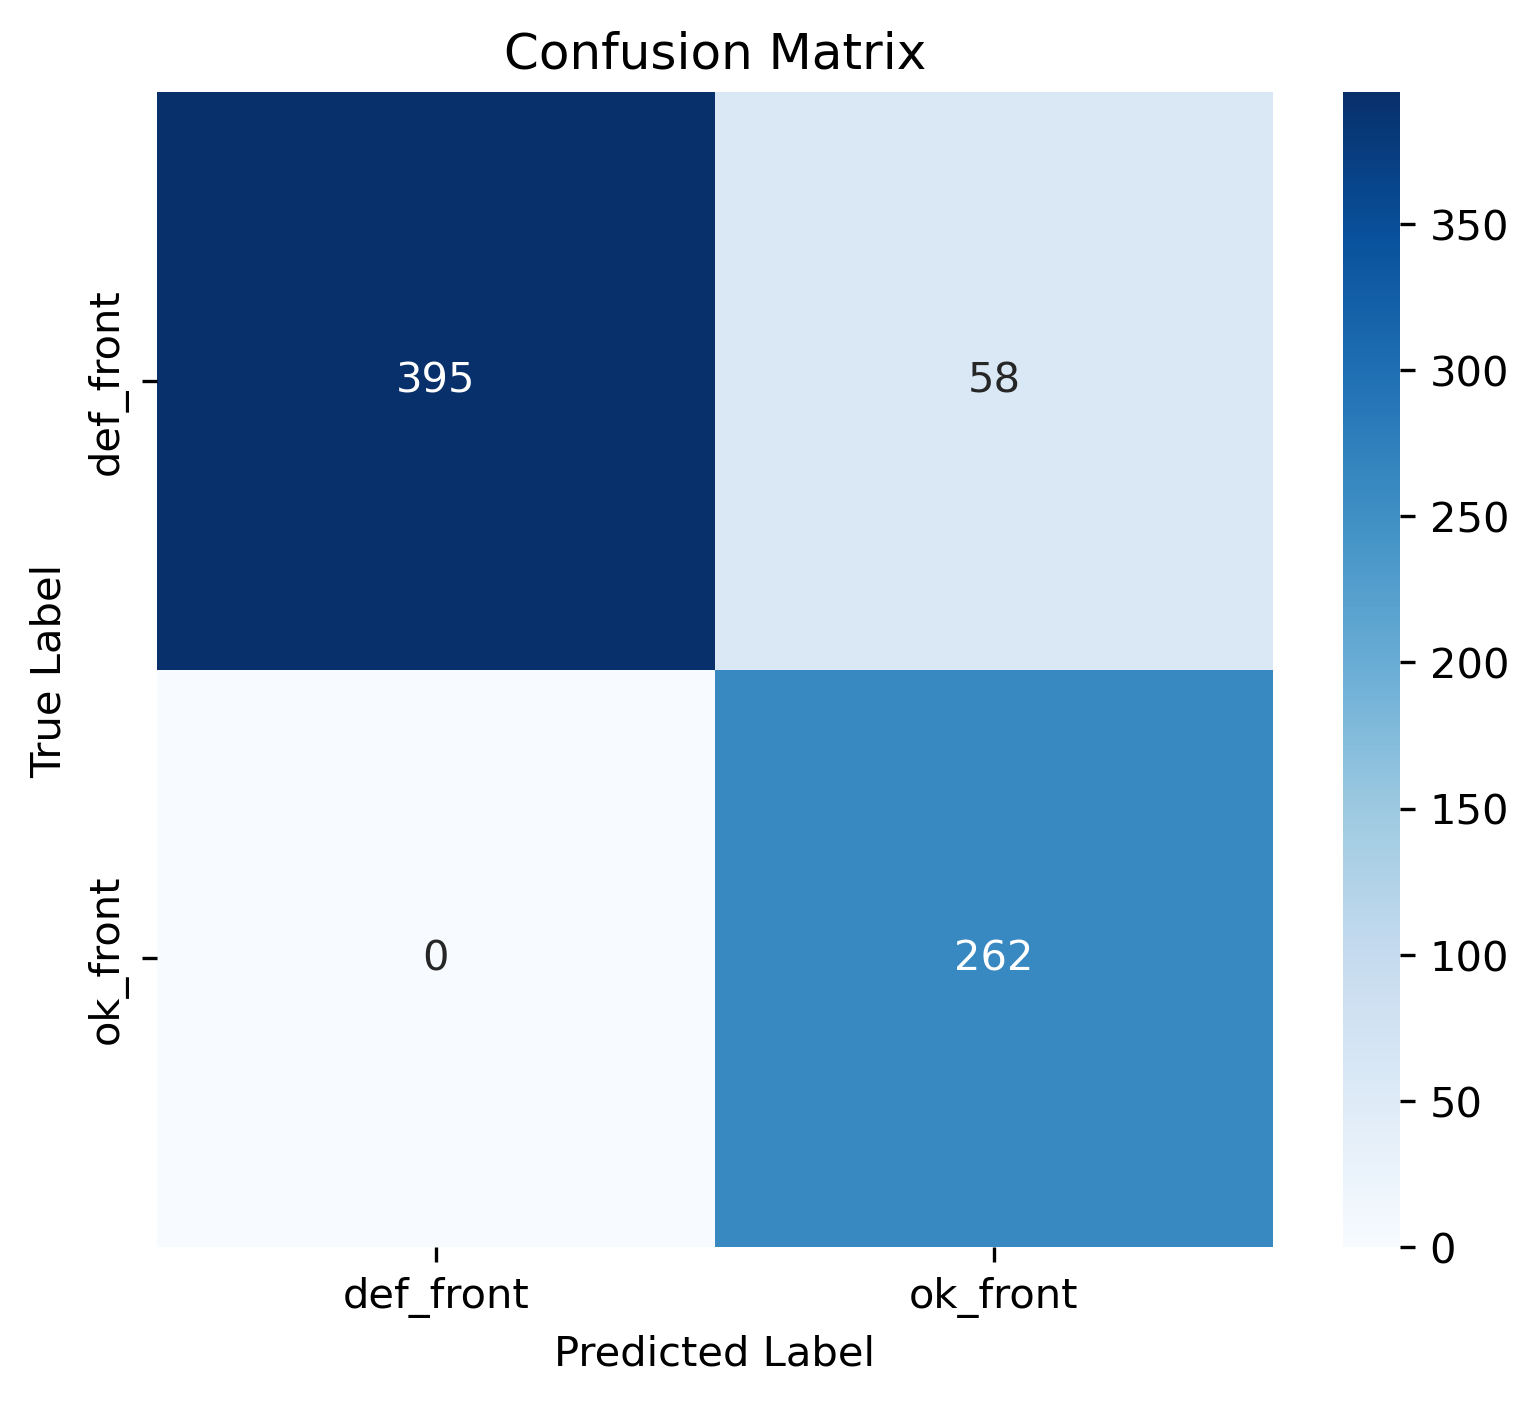

In [228]:
# Get the true labels (0 or 1)
true_labels = test_generator.labels

# Make predictions
y_pred_prob = model.predict(test_generator, verbose=1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions (0 or 1)

# Check class indices
print("Class Indices:", test_generator.class_indices)
print("Sample True Labels (First 10):", true_labels[:10])
print("Sample Predictions (First 10):", y_pred[:10])

# Define target names based on class indices
target_names = ['def_front', 'ok_front']

# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
print("\nClassification Report:")
print(classification_report(true_labels, y_pred, target_names=target_names))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

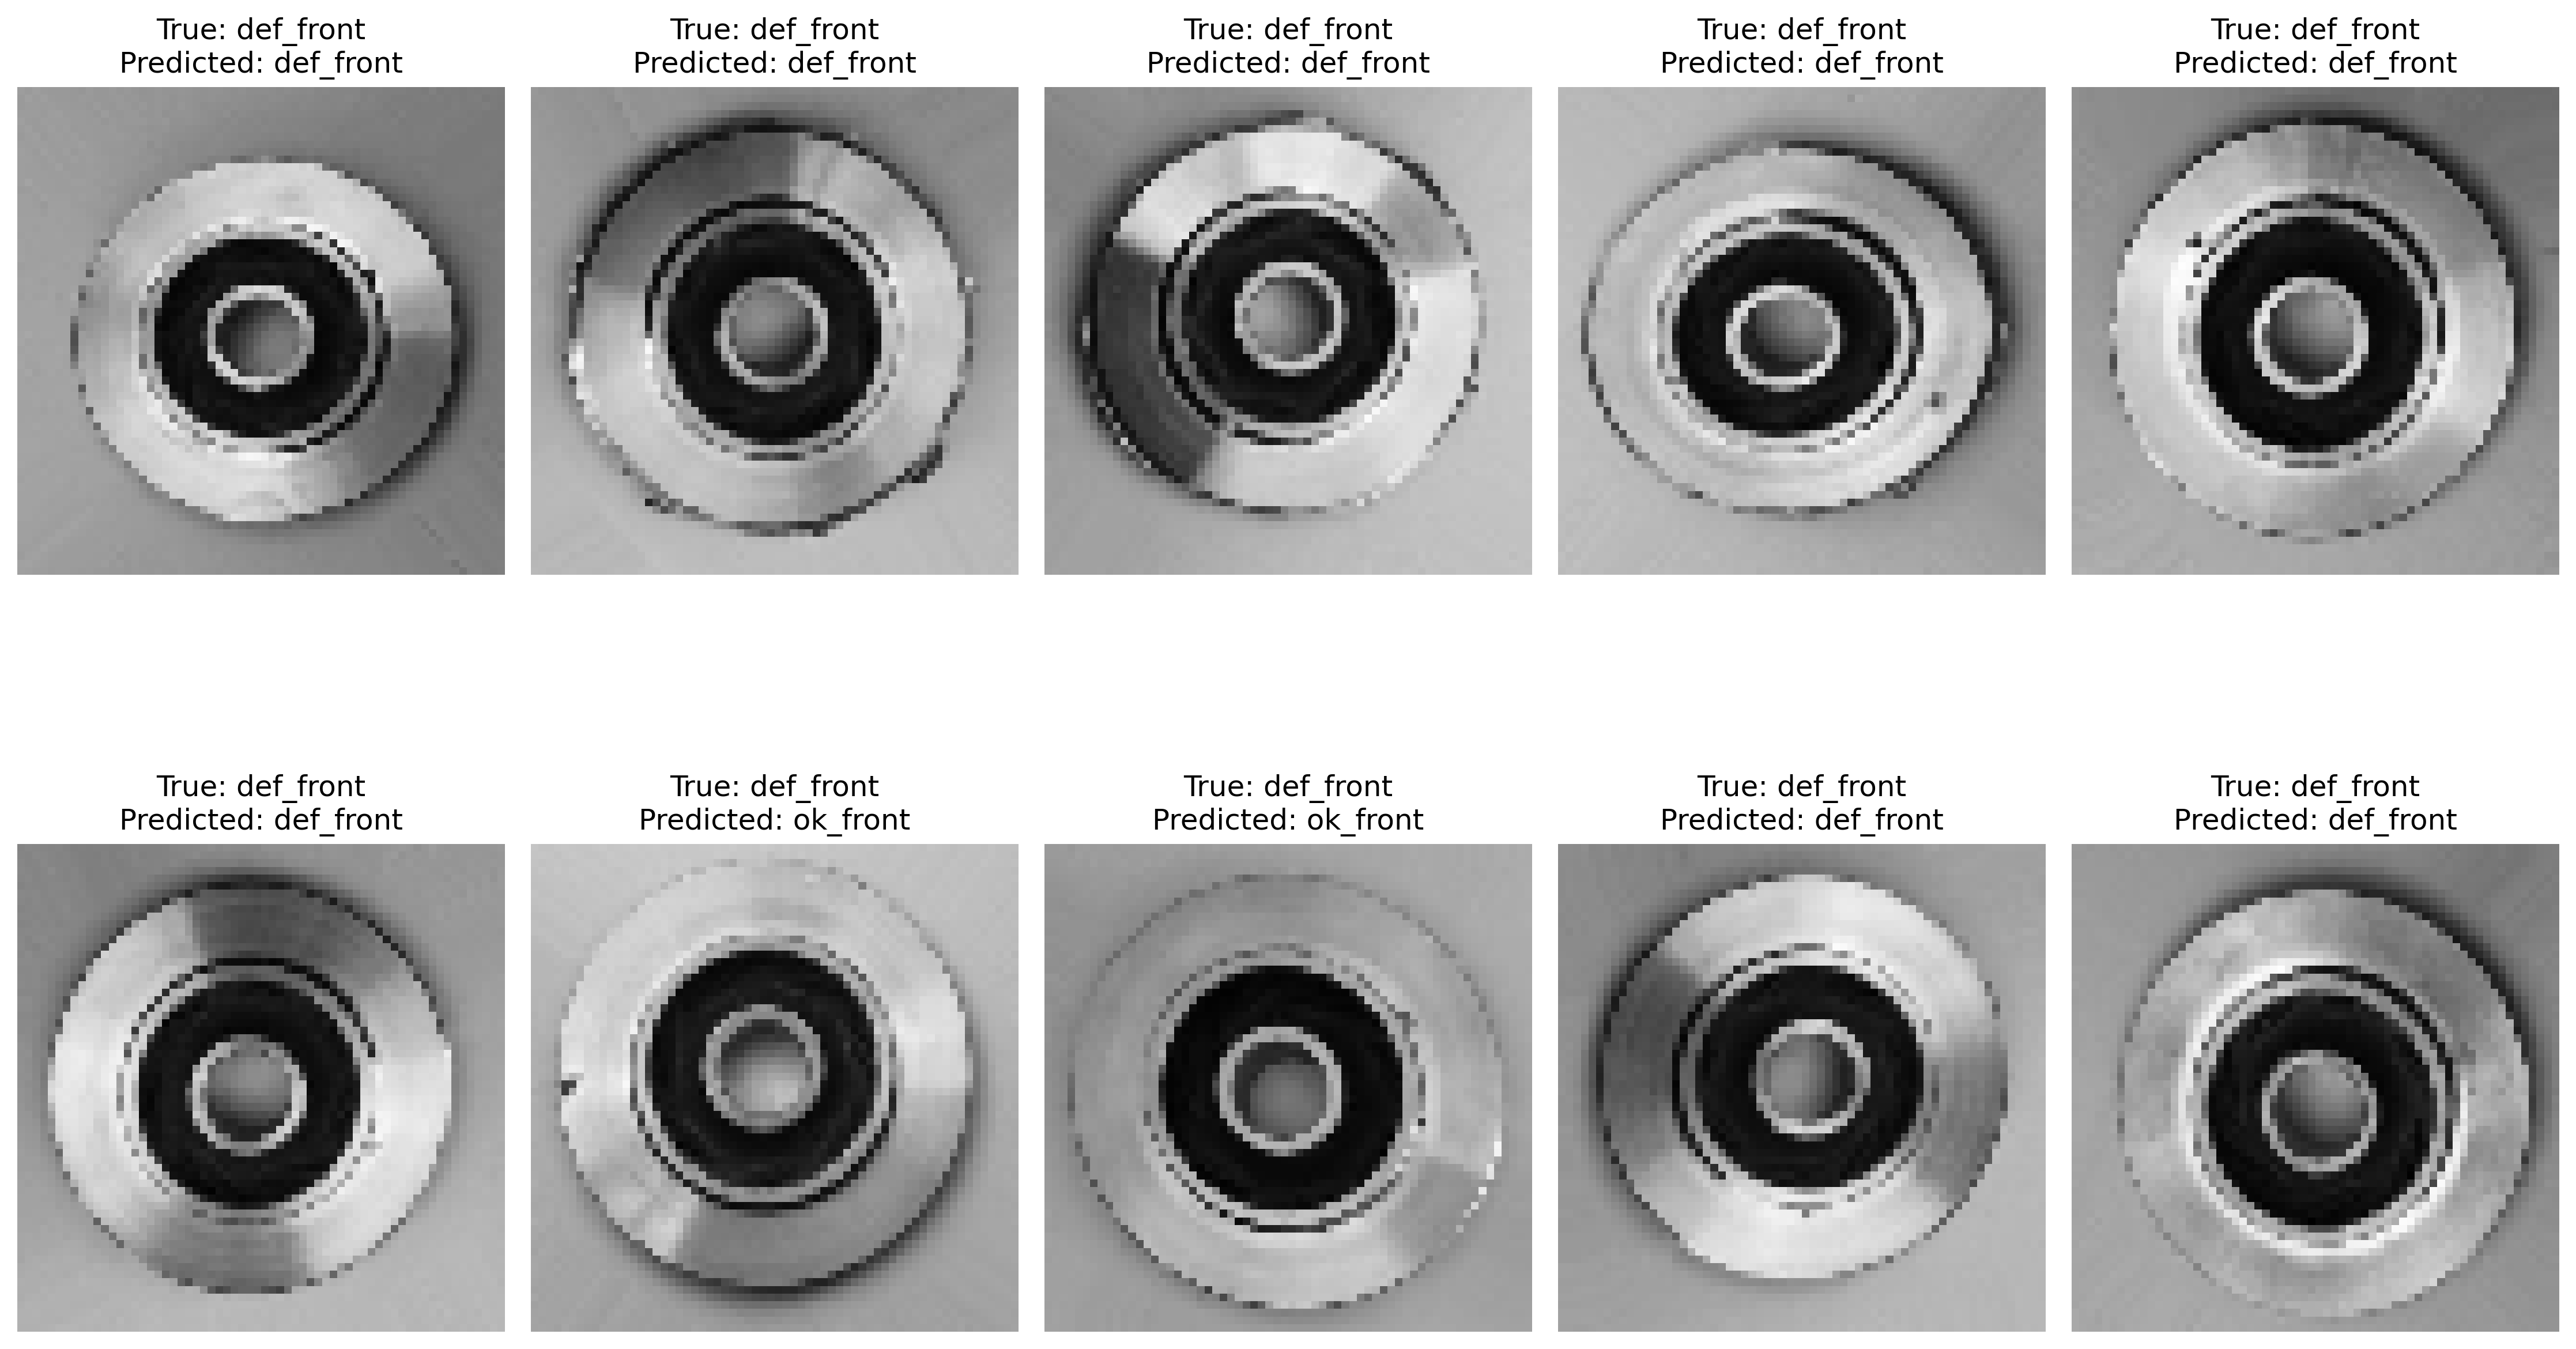

In [231]:
# Initialize lists to store the images, true labels, and predicted labels
images_list = []
true_labels_list = []
predicted_labels_list = []

# Loop through the test generator to get images, true labels, and predictions
for images, true_labels in test_generator:
    y_pred_prob = model.predict(images, verbose=0) 
    y_pred = (y_pred_prob > 0.5).astype(int).flatten() 

    # Append the images and labels to lists
    images_list.extend(images)
    true_labels_list.extend(true_labels)
    predicted_labels_list.extend(y_pred)

    # Stop once you have enough images (e.g., 10 images)
    if len(images_list) >= 10:
        break

# Randomly select 10 images for display
selected_samples = random.sample(list(zip(images_list, true_labels_list, predicted_labels_list)), 10)

# Plot the selected images with true and predicted labels
plt.figure(figsize=(15, 10))
for i, (img, true_label, predicted_label) in enumerate(selected_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    true_class = 'def_front' if true_label == 0 else 'ok_front'
    predicted_class = 'def_front' if predicted_label == 0 else 'ok_front'
    plt.title(f"True: {true_class}\nPredicted: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [234]:
# Save the model
model.save('cast_defect_model.h5')
print("Model saved as cast_defect_model.h5")

Model saved as cast_defect_model.h5
